# Assignment8

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [30]:
df = pd.read_csv("car_data.csv")

In [31]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [32]:
# Getting some Statistical Measure about the data
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [33]:
# No of Rows and Columns in the Data Frame
df.shape

(804, 12)

In [34]:
# Checking if there is any null values present or not
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


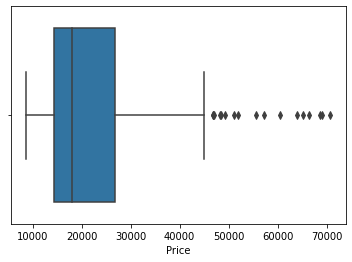

In [35]:
import seaborn as sns
sns.boxplot(df['Price'])

In [36]:
Q3 = df['Price'].quantile(0.75)
Q1 = df['Price'].quantile(0.25)
IQR=(Q3-Q1)
print(Q3)
print(Q1)
print(IQR)

26717.3166356619
14273.073870330325
12444.242765331575


In [37]:
# Upper bound
upper = np.where(df['Price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Price'] <= (Q1-1.5*IQR))

In [38]:
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


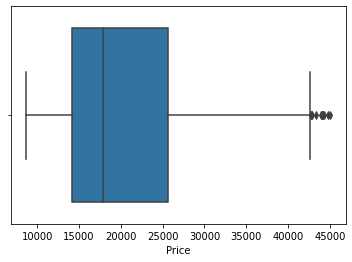

In [39]:
import seaborn as sns
sns.boxplot(df['Price'])

In [40]:
# Upper bound
upper = np.where(df['Price'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Price'] <= (Q1-1.5*IQR))
print(upper)
print(lower)

(array([], dtype=int64),)
(array([], dtype=int64),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


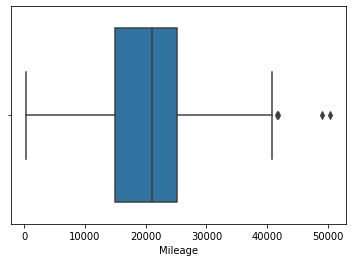

In [41]:
import seaborn as sns
sns.boxplot(df['Mileage'])

In [42]:
Q3 = df['Mileage'].quantile(0.75)
Q1 = df['Mileage'].quantile(0.25)
IQR=(Q3-Q1)
print(Q3)
print(Q1)
print(IQR)

25217.0
14880.5
10336.5


In [43]:
# Upper bound
upper = np.where(df['Mileage'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Mileage'] <= (Q1-1.5*IQR))
print(upper)
print(lower)

(array([116, 512, 632, 662]),)
(array([], dtype=int64),)


In [44]:
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


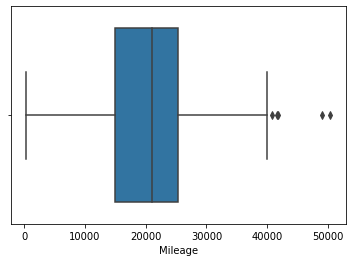

In [45]:
import seaborn as sns
sns.boxplot(df['Mileage'])

In [46]:
df.dtypes

Price       float64
Mileage       int64
Make         object
Model        object
Trim         object
Type         object
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [47]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.099975,0.519964,0.533433,-0.048373,0.461023,-0.184013,0.132613
Mileage,-0.099975,1.000000,0.003653,0.017245,-0.023737,0.037674,-0.018457,0.012865
Cylinder,0.519964,0.003653,1.000000,0.957928,0.049796,0.346918,-0.104115,0.048732
Liter,0.533433,0.017245,0.957928,1.000000,-0.047567,0.371816,-0.077056,0.064428
Doors,-0.048373,-0.023737,0.049796,-0.047567,1.000000,-0.034958,-0.048379,-0.053985
Cruise,0.461023,0.037674,0.346918,0.371816,-0.034958,1.000000,-0.097462,-0.079297
Sound,-0.184013,-0.018457,-0.104115,-0.077056,-0.048379,-0.097462,1.000000,0.165523
Leather,0.132613,0.012865,0.048732,0.064428,-0.053985,-0.079297,0.165523,1.000000


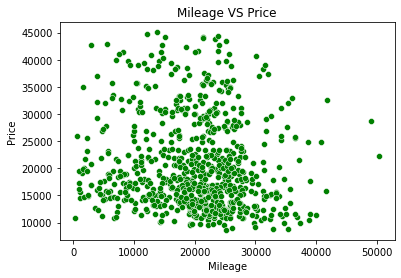

In [48]:
import seaborn as sns
sns.scatterplot(x='Mileage', y='Price', data=df, color='green')
plt.title('Mileage VS Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

There is no Linear relationship between the Price and Mileage.

In [49]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Make']= label_encoder.fit_transform(df['Make'])

df['Make'].unique()

array([0, 1, 2, 3, 4, 5])

In [50]:
# Encode labels in column 'species'.
df['Model']= label_encoder.fit_transform(df['Model'])

df['Model'].unique()

array([10, 22, 23, 26,  7,  8, 14, 27, 28,  5,  9, 11, 12, 13, 19, 24, 25,
        6, 15, 17, 18, 16, 29, 30,  1,  2,  3,  4,  0, 20, 21])

In [51]:
df['Trim']= label_encoder.fit_transform(df['Trim'])

df['Trim'].unique()

array([43,  7,  8,  9, 12, 31, 44, 13, 14, 22, 24, 28, 30, 41, 42, 11, 21,
       25, 26, 10, 40, 23, 29, 35, 27, 39, 19, 37, 38, 16, 15, 18,  0, 17,
       45, 32, 33,  1,  2,  4,  5,  6, 34,  3, 36, 20])

In [52]:
df['Type']= label_encoder.fit_transform(df['Type'])

df['Type'].unique()

array([3, 2, 1, 0, 4])

In [53]:
X=df.drop(['Price', 'Mileage'], axis=1)
Y=df['Price']

In [54]:
X

,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,0,10,43,3,6,3.1,4,1,1,1
1,0,10,43,3,6,3.1,4,1,1,0
2,0,10,43,3,6,3.1,4,1,1,0
3,0,10,43,3,6,3.1,4,1,0,0
4,0,10,43,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...
799,5,21,20,3,6,3.0,4,1,0,0
800,5,21,20,3,6,3.0,4,1,1,0
801,5,21,20,3,6,3.0,4,1,1,0
802,5,21,20,3,6,3.0,4,1,1,0


In [55]:
Y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 783, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

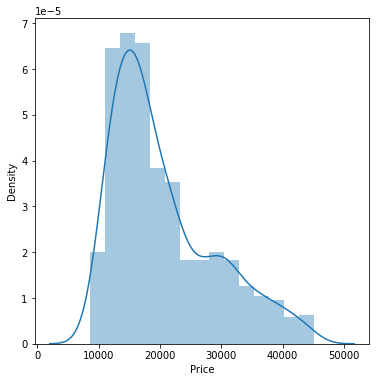

In [56]:
import seaborn as sns
plt.figure(figsize=(6,6))
sns.distplot(df['Price'])
plt.show

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [58]:
print(X_train.shape, X_test.shape)

(626, 10) (157, 10)


In [59]:
print(Y_train.shape, Y_test.shape)

(626,) (157,)


In [60]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [61]:
Y_pred=model.predict(X_test)

In [62]:
model.intercept_

5783.307911433571

In [63]:
model.coef_

array([  652.5743554 ,  -263.91212935,   -71.62573504,  1303.64818161,
        2430.04987697,  1546.09164491, -1453.34959368,  4238.6182944 ,
       -1791.53986893,  2337.13382738])

In [64]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is 0.5054851581367432


In [65]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred, 'Difference': Y_test - Y_pred})
df

,Actual,Predicted,Difference
400,19164.610627,21908.926319,-2744.315691
505,20830.994296,24435.852378,-3604.858082
369,18083.396299,23692.314459,-5608.918160
14,19774.249066,22503.848527,-2729.599461
161,12163.820425,15518.107760,-3354.287336
...,...,...,...
64,23493.082295,16841.758050,6651.324245
642,26775.032089,20914.591210,5860.440880
52,21646.116924,20830.137086,815.979838
509,19338.375998,28564.526075,-9226.150077
